In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [64]:
df = np.loadtxt("C:/Users/Konrad/Desktop/DCF/DCF/Data/Yield/Yield_binned/New/Yield_1799_am.txt")
energyData = df[:,0]
yieldData = df[:,1]
yerror = df[:,2]

color = ["blue", "green", "red", "black"]
run = df[:,3]
log = []
for i in run:
    log.append(color[int(i)])

X,Y, Yerror, C = zip(*sorted(zip(energyData,yieldData,yerror,log)))

def arcTan(x, A, B, C, D):
    val = A*np.arctan(B*(x+C)) + D
    return val

guess632 = [10, 1, -650, 10]
guess992 = [30, 10, -1019, 50]
guess992_II = [10, 0.01, -1019.1, 10]
guess1213 = [10, 1, -1246, 10]
guess1587 = [15, 1, -1630, 15]
guess1799 = [20, 3, -1850, 25]
guesswidth = [150, 1025, 10, 1, 1]


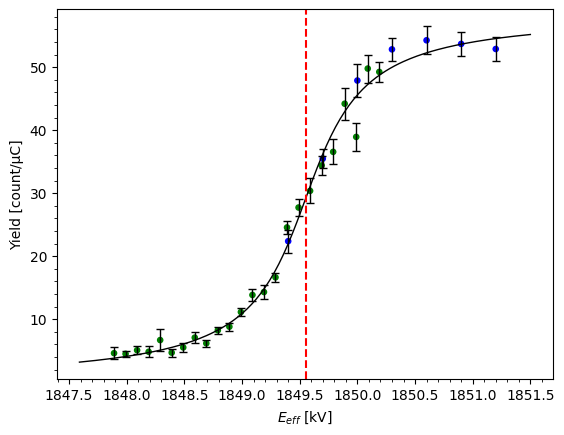

[   18.83431568     2.64773888 -1849.55240217    29.20086241] [0.68280373 0.22399033 0.02375276 0.63212793]
1.4252668778963673


In [65]:
scaled = np.array(Yerror)*1
parameters, covariance = curve_fit(arcTan, X, Y, sigma=scaled, p0 = guess1799)
error = np.sqrt(np.diag(covariance))

grid = np.linspace(energyData.min() - 0.3, energyData.max() + 0.3, 200)
fitTan = arcTan(grid, *parameters)
plt.plot(grid, fitTan, '-', label='arctan', color = "black", linewidth = 1)
plt.axvline(x=abs(parameters[2]), color='red', linestyle='--', label='Resonance')
plt.scatter(X, Y, label = 'first measurement', c = C, s = 14)
plt.errorbar(X, Y, yerr=scaled, color = "black", fmt="none", capsize = 3, capthick = 1, elinewidth = 1)
plt.minorticks_on()
plt.xlabel("$E_{eff}$ [kV]")
plt.ylabel("Yield [count/μC]")
plt.rc('ytick', labelsize=10) 
plt.rc('xtick', labelsize=10) 
#plt.xlim(1017.34, 1021.05)
plt.show()

print(parameters, error)
observed_data = np.array(Y)
expected_data = np.array(arcTan(X, *parameters))
chi2 = np.sum(((observed_data - expected_data)**2) / (scaled**2))
print(chi2/len(observed_data))

Plot single data set with the aprioprate size and legend


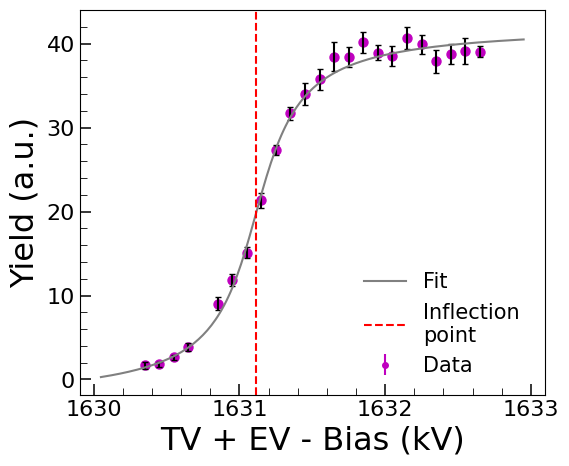

In [63]:
#create an errorbar handle to be used in the plot
xdata = np.linspace(0,5,5)
y = xdata
yerr = np.random.rand(5)

#specify font
hfont = {'fontname':'sans-serif'}


fig, ax = plt.subplots(figsize = (6,5))
errorb = ax.errorbar(x=xdata, y=y, yerr= yerr, color = "m", fmt = "o", label = "Data", markersize = 4)
ax.clear()


ax.errorbar( X, Y, yerr = scaled, fmt = "none",color = "black", capsize = 2)
ax.plot( grid, fitTan, '-', label="Fit", color = "gray") 
ax.scatter(X, Y, color = "m", s = 42)
ax.axvline(x = abs(parameters[2]), color = 'r', label = 'Inflection \npoint', ls = "--")

#reorder handles so data is on top in the legend 
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([errorb])

ax.set_xlabel( "TV + EV - Bias (kV)",  fontsize = 23, **hfont)
ax.set_ylabel( "Yield (a.u.)", fontsize = 23, **hfont)
ax.minorticks_on()
ax.tick_params(axis = "both", direction = "in", labelsize = 16, length = 8, width = 1.1)
ax.tick_params(which = "minor", axis = "both", direction = "in",length = 5, width = 0.6)
ax.legend(handles = handles, frameon = False, prop = {"family" : ["sans-serif"], "size" : 15})

#hide every other tick label
""" labelX = ax.xaxis.get_ticklabels()
for lx in labelX[::2]:
    lx.set_visible(False)

labelY = ax.yaxis.get_ticklabels()
for ly in labelY[::2]:
    ly.set_visible(False) """

plt.savefig( "data/1587.png", dpi = 800, bbox_inches = "tight")
plt.show( )

Plot multiple datasets with correct size and label


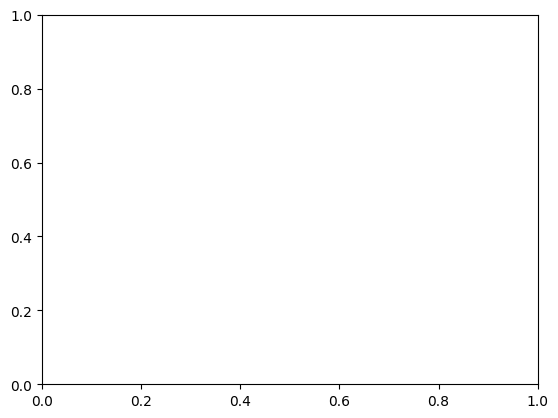

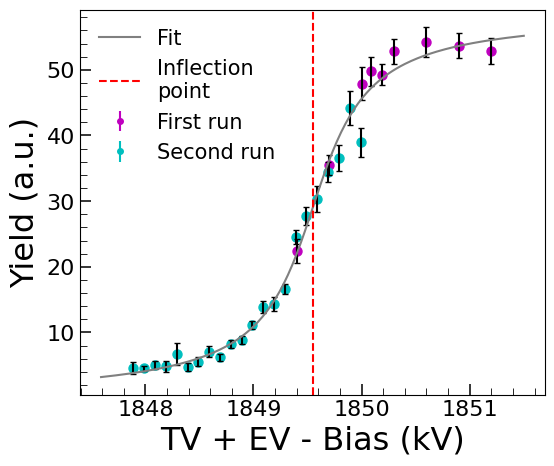

In [66]:
#create a fake errorbar handle to be used in the later plot
xdata = np.linspace(0,5,5)
y = xdata
yerr = np.random.rand(5)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
errorb = ax.errorbar(x=xdata, y=y, yerr= yerr, color = "m", fmt = "o", label = "First run", markersize = 4)
errorb1 = ax.errorbar(x=xdata, y=y, yerr= yerr, color = "c", fmt = "o", label = "Second run", markersize = 4)
ax.clear()

#add a cutoff for the data to be plit into runs
cutoff = 9

#specify font
hfont = {'fontname':'sans-serif'}

#figure plot with multiple runs
fig, ax = plt.subplots(figsize = (6,5))
ax.errorbar( X, Y, yerr= scaled, fmt = "none",color = "black", capsize = 2)
ax.plot( grid, fitTan, '-', label="Fit", color = "gray") 
ax.scatter(energyData[0:cutoff], yieldData[0:cutoff], color = "m", s = 42)
ax.scatter(energyData[cutoff:], yieldData[cutoff:], color = "c", s = 42)
ax.axvline(x = abs(parameters[2]), color = 'r', label = 'Inflection \npoint', ls = "--")



#set label and tickmark parameters
ax.set_xlabel( "TV + EV - Bias (kV)",  fontsize = 23, **hfont)
ax.set_ylabel( "Yield (a.u.)", fontsize = 23, **hfont)
ax.minorticks_on()
ax.tick_params(axis = "both", direction = "in", labelsize = 16, length = 8, width = 1.1)
ax.tick_params(which = "minor", axis = "both", direction = "in",length = 5, width = 0.6)

#reorder handles so data is on top in the legend 
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([errorb])
handles.extend([errorb1])
ax.legend(handles = handles, frameon = False, prop = {"family" : ["sans-serif"], "size" : 15})

#hide every other tick label
""" labelX = ax.xaxis.get_ticklabels()
for lx in labelX[::2]:
    lx.set_visible(False)

labelY = ax.yaxis.get_ticklabels()
for ly in labelY[::2]:
    ly.set_visible(False) """

plt.savefig( "data/1799.png", dpi = 800, bbox_inches = "tight")
plt.show( )
